# Import software libraries and load the dataset

In [7]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))

# Load the dataset.
stores_df = pd.read_csv('../data/stores_data_full_clean.csv',index_col = 0)
stores_df['Date'] = pd.to_datetime(stores_df['Date'])
print('\nLoaded dataset.')

# Format floats with comma in thousands place
pd.options.display.float_format = '{:,.2f}'.format

Libraries used in this project:
- Python 3.7.16 (default, Dec  7 2022, 01:38:05) 
[Clang 14.0.0 (clang-1400.0.29.202)]
- NumPy 1.18.1
- pandas 1.0.1
- Matplotlib 3.1.3

Loaded dataset.


# Generate stack plots to compare total items sold for each day in January and February

In [8]:
jan = stores_df[stores_df['Date'].dt.month == 1]
feb = stores_df[stores_df['Date'].dt.month == 2]

jan_quant = stores_df.groupby(jan['Date'].dt.day)['Quantity'].sum()
feb_quant = stores_df.groupby(feb['Date'].dt.day)['Quantity'].sum()
feb_quant = feb_quant.append(pd.Series([np.nan, np.nan, np.nan]),
                             ignore_index = True)

jan_quant.head()

Date
1.00    81
2.00    48
3.00    37
4.00    32
5.00    55
Name: Quantity, dtype: int64

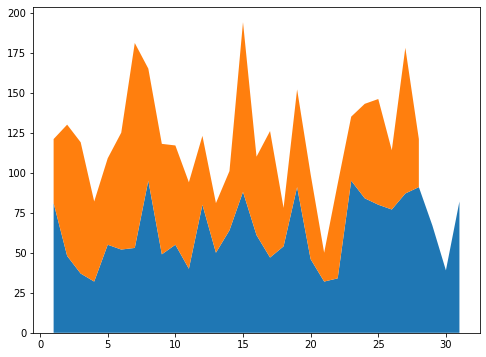

In [9]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.stackplot(jan_quant.index, jan_quant, feb_quant)

# Generate scatter plots to see how different variables correlate with gross income

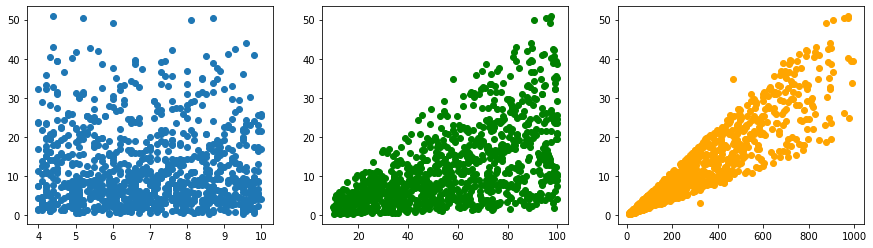

In [10]:
y = stores_df['GrossIncome']
fig, ax = plt.subplots(1, 3, figsize = (15, 4))
ax[0].scatter(stores_df['CustomerRating'], y)
ax[1].scatter(stores_df['UnitPrice'], y, c = 'green')
ax[2].scatter(stores_df['Revenue'], y, c = 'orange')

# Generate bar charts comparing branch revenue per product line

In [ ]:
prod_rev = stores_df.groupby(['ProductLine', 'Branch'])['Revenue'].sum()
prod_rev

In [ ]:
# Define lists of product lines and branches to iterate over.
prods = prod_rev.index.get_level_values('ProductLine').unique()
branch = prod_rev.index.get_level_values('Branch').unique()
i = 0

fig, ax = plt.subplots(2, 3, figsize = (14, 8))

for col in range(0, 3):
    ax[0, col].bar(branch, prod_rev.loc[[prods[i]]])
    i += 1
    
for col in range(0, 3):
    ax[1, col].bar(branch, prod_rev.loc[[prods[i]]])
    i += 1

# Generate histograms and box plots that show the distributions of revenue and income

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax[0].hist(stores_df['Revenue'], bins = 20)
ax[1].hist(stores_df['GrossIncome'], bins = 20);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax[0].boxplot(stores_df['Revenue'])
ax[1].boxplot(stores_df['GrossIncome']);

# Generate violin plots that compare the distributions of unit price and tax price

In [ ]:
# Define lists of prices for each month.
jan_unit_tax = [jan['UnitPrice'].values, jan['TaxPrice'].values]
feb_unit_tax = [feb['UnitPrice'].values, feb['TaxPrice'].values]

fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax[0].violinplot(jan_unit_tax, showmeans = True)
ax[1].violinplot(feb_unit_tax, showmeans = True);

# Generate a `GridSpec` of multiple plots showing the distributions of revenue and income

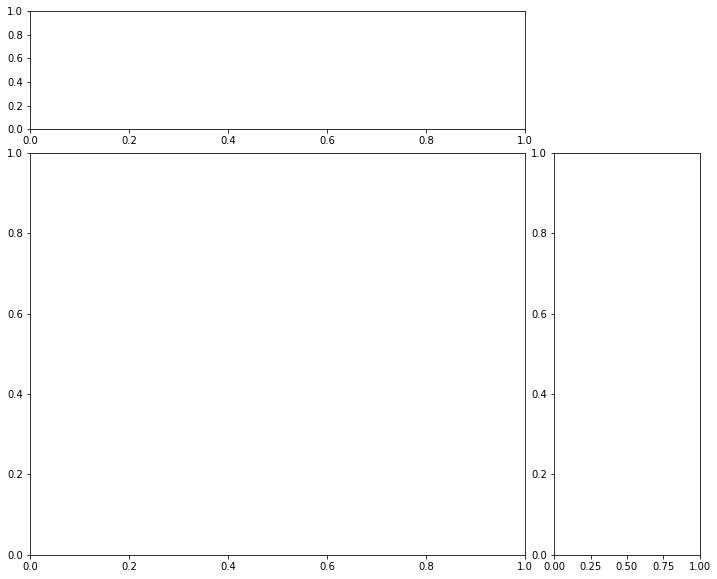

In [12]:
# Set up grid first.
fig = plt.figure(figsize = (12, 10))
grid = fig.add_gridspec(4, 4)

ax_top = fig.add_subplot(grid[0, :3])
ax_right = fig.add_subplot(grid[1:4, 3])
ax_mid = fig.add_subplot(grid[1:4, :3])

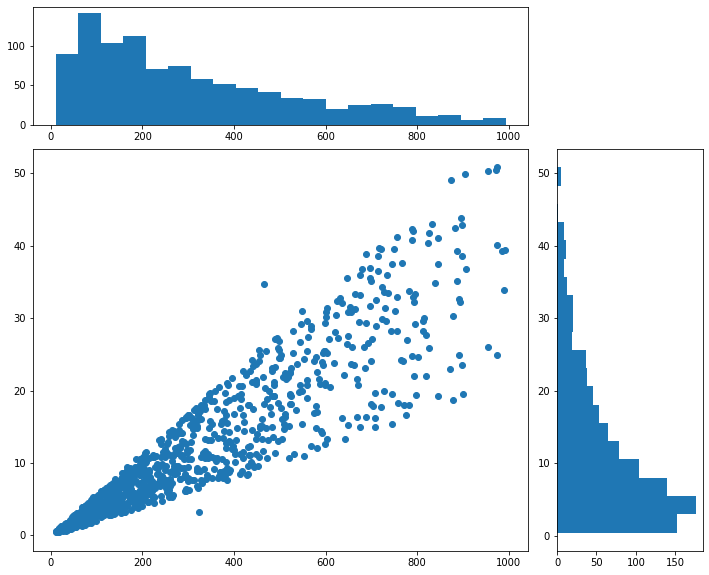

In [13]:
ax_top.hist(stores_df['Revenue'], bins = 20)
ax_right.hist(stores_df['GrossIncome'],
              bins = 20, orientation = 'horizontal')
ax_mid.scatter(stores_df['Revenue'], stores_df['GrossIncome'])
fig

# Generate a 3-D scatter plot comparing revenue, gross income, and customer rating

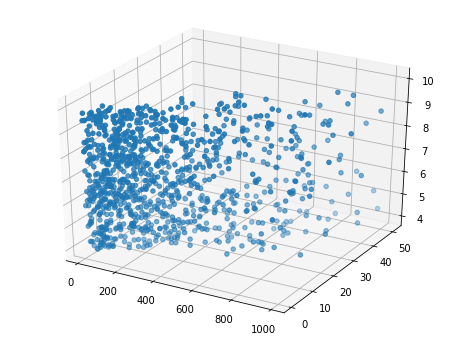

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(projection = '3d')
ax.scatter(stores_df['Revenue'],
           stores_df['GrossIncome'],
           stores_df['CustomerRating']);

In [ ]:
ax.view_init(azim = -20)
fig